In [545]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.animation as animation
from tqdm import tqdm

In [546]:
Nx = 50
Nt = 1000
x = np.linspace(0.,1.,Nx)
t = np.linspace(0.,10.,Nt)

dt = t[1] - t[0]
dx = x[1] - x[0]
D = 0.01
v = 5.
lambda_ = D*dt/dx
print(lambda_, 1/2)
print(lambda_<1/2)

0.004904904904904905 0.5
True


In [547]:
def ui(x):
    return 0.15
    #return np.sin(np.pi*x)
   # return -x/4

In [548]:
def InitT():
    
    u = np.zeros((Nt,Nx))
    u[0,:] = ui(x)

    u[:,0] = 0.1
    u[:,-1] = 0.2
    
    return u

def InitW():
    
    w = np.zeros((Nt,Nx))
    w[0,:] = ui(x)
    
    return w

In [549]:
u = InitT()
w = InitW()

In [550]:
def h1(t):
    return 0.1
def h2(t):
    return 0.2

<IPython.core.display.Javascript object>


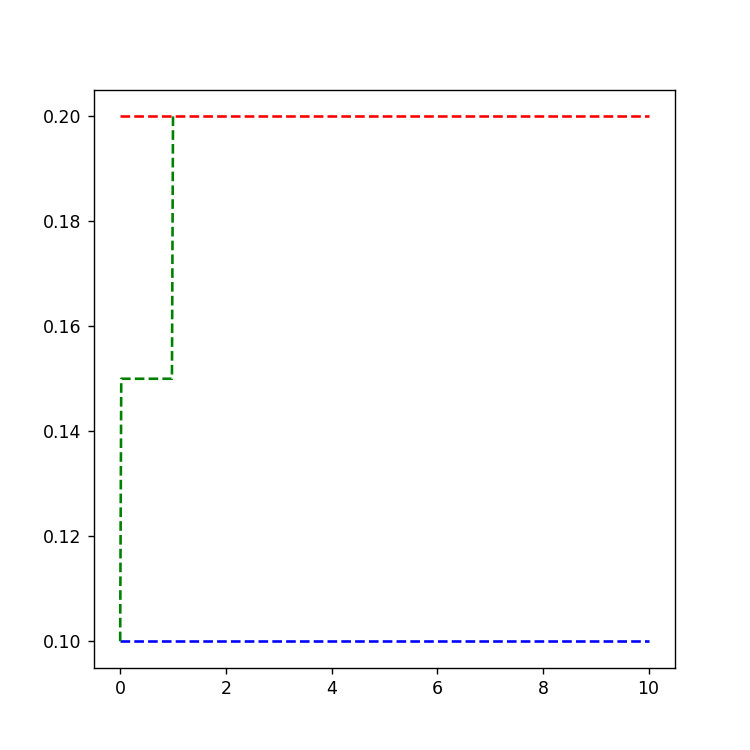

In [551]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1,1,1)

plot = ax1.plot(t,u[:,0], '--' ,color='b', label=r'$u[0,t]$')

plot = ax1.plot(t,u[:,-1], '--' ,color='r', label=r'$u[-1,t]$')
plot = ax1.plot(x,u[0,:], '--' ,color='g', label=r'$u[x,0]$')

#Esto es para verificar que la inicialización es correcta



In [552]:
def GetSolution():
    
    a = 0.2
    b = 0.3
    D = 0.01
    e =0.03
    
    for l in tqdm(range(1,len(t))):
        
        if l==1:
            u[l,:] = u[l-1,:]
        else:
            
            u[l,0] = h1(t[l])
            u[l,-1] = h2(t[l])
            
            
            
            for i in range(1,len(x)-1):
    
                    u[l,i] =dt*(D*((u[l-1,i+1]-2*u[l-1,i]+u[l-1,i-1])/(dx**2))-\
                                (u[l-1,i]*(u[l-1,i]-a)*(1-u[l-1,i]))+w[l-1, i])+u[l-1,i]
                    w[l,i] = (dt*(e*(u[l-1,i]-b*w[l-1,i])))+w[l-1,i]
                       
        

            
                    
                

In [553]:
GetSolution()

100%|██████████████████████████████████████████████████████████████████████████████| 999/999 [00:00<00:00, 5084.57it/s]


In [554]:
u[0,:]


array([0.1 , 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15,
       0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15,
       0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15,
       0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15,
       0.15, 0.15, 0.15, 0.15, 0.15, 0.2 ])

In [555]:
w[0,:]

array([0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15,
       0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15,
       0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15,
       0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15,
       0.15, 0.15, 0.15, 0.15, 0.15, 0.15])

<IPython.core.display.Javascript object>


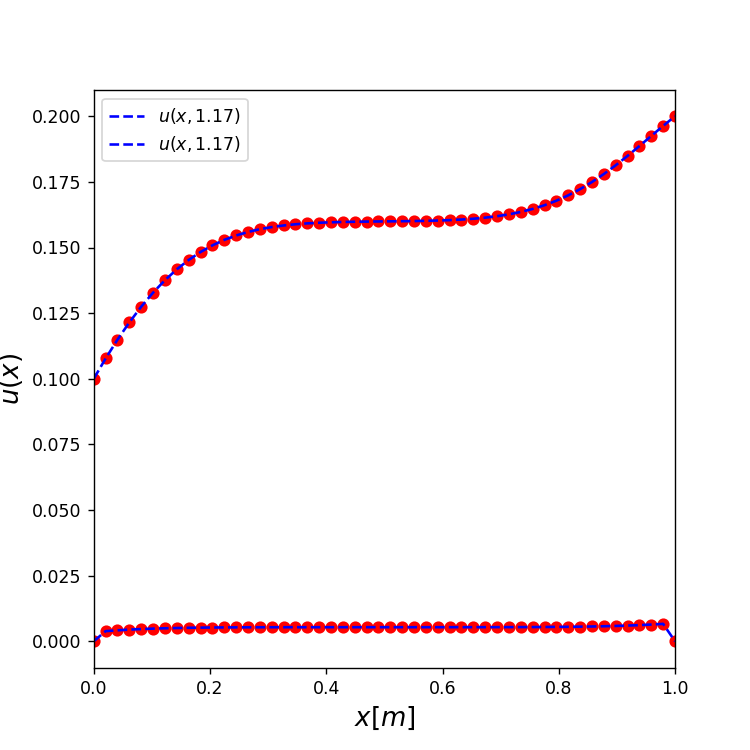

In [556]:
# Zona de animacion
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

def init():
    
    ax.set_xlim(x[0],x[-1])
    """ax.set_ylim(-1.5,1.5)"""
    ax.set_xlabel(r'$x[m]$', fontsize=15)
    ax.set_ylabel(r'$u(x)$', fontsize=15)    
    
def Update(i):
    plot = ax.clear()
    init()
    plot = ax.plot(x,u[i,:], '--' ,color='b', label=r'$u(x,%.2f)$' %(t[i]))
    plot = ax.scatter(x,u[i,:], marker='o', color='r')
    plot = ax.plot(x,w[i,:], '--' ,color='b', label=r'$u(x,%.2f)$' %(t[i]))
    plot = ax.scatter(x,w[i,:], marker='o', color='r')
    plot = plt.legend(loc=0)
    
    
    """plot = ax2.clear()
    init()
    plot = ax2.plot(x,w[i,:], '--' ,color='b', label=r'$u(x,%.2f)$' %(t[i]))
    plot = ax2.scatter(x,w[i,:], marker='o', color='r')
    plot = plt.legend(loc=0)"""
    
    return plot

Animation = animation.FuncAnimation(fig, Update, frames=len(t), init_func=init)

In [557]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me') )
#Animation.save( 'OndeNeurona.mp4', writer=writer )

In [558]:
for l in range(0, len(t)): 
    
    posicion = u[l,:]
    timeMax = -1
    
    max = np.max(posicion)    
    if max>= 0.3: 
        timeMax = l
        posMax = posicion.tolist().index(max)
        break
print("En el posición {} la neurona se activa, en un tiempo {} s".format(posMax, timeMax ))

        
        
    

En el posición 30 la neurona se activa, en un tiempo 829 s
